# Problem Statement
The loan prediction project is aimed at developing a classification model that predicts whether a loan application will be approved or not based on various features such as loan amount, employment status, etc. The primary objective of the project is to build a predictive model that can accurately classify the loan applications as approved or not approved.To achieve this, the project will employ two popular machine learning algorithms, K-Nearest Neighbors (KNN) and Decision Tree Classifier, and then compare the results to determine which algorithm is better suited for the task.

The dataset will first be preprocessed to handle any missing or inconsistent data, such as imputing missing values or scaling numerical features. After preprocessing, the dataset will be split into training and testing sets to evaluate the performance of the machine learning models.

The KNN algorithm is a popular supervised machine learning algorithm that can be used for both classification and regression tasks. The algorithm works by finding the k-nearest neighbors of a data point based on some similarity metric and then classifying the data point based on the majority class of its neighbors. 

The Decision Tree Classifier is another popular machine learning algorithm used for classification tasks. The algorithm works by recursively splitting the data based on the feature that provides the most information gain, with the objective of creating a tree that maximizes the separation between the classes. 

The performance of the KNN and Decision Tree Classifier models will be evaluated based on metrics such as accuracy, precision, recall, and F1 score. These metrics will be used to compare the performance of the two models and determine which algorithm is better suited for the loan prediction task.



# Dataset Description
The loan prediction dataset contains 614 rows and 13 columns. <br>

The columns in the dataset are:

Loan_ID: Unique Loan ID<br>
Gender: Male/Female<br>
Married: Applicant married (Y/N)<br>
Dependents: Number of dependents<br>
Education: Applicant Education (Graduate/Under Graduate)<br>
Self_Employed: Self-employed (Y/N)<br>
ApplicantIncome: Applicant income<br>
CoapplicantIncome: Coapplicant income<br>
LoanAmount: Loan amount in thousands<br>
Loan_Amount_Term: Term of loan in months<br>
Credit_History: credit history meets guidelines<br>
Property_Area: Urban/Semi-Urban/Rural<br>
Loan_Status: Loan approved (Y/N)<br>
<br>
Source - https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset


# Task

## Importing Libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,
classification_report,precision_score,recall_score, f1_score
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

## Data Exploration and Pre-processing

In [139]:
df = pd.read_csv("data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### Dropping Loan_ID since this column is a primary key and an irrelevant feature.

In [140]:
df= df.drop("Loan_ID", axis='columns')
print(df.shape)
df.info()

(614, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Descriptive Statistics

In [141]:
# Compute descriptive statistics of the dependent variable
print("Descriptive Statistics of Loan_Status:")
print(df['Loan_Status'].describe())

# Compute descriptive statistics of the independent variables
print("\nDescriptive Statistics of Independent Variables:")
print(df.drop('Loan_Status', axis=1).describe())

Descriptive Statistics of Loan_Status:
count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

Descriptive Statistics of Independent Variables:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50

### Checking for and dealing with missing values

In [142]:
print(df.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


We handle na values differently for different columns. 

For categorical data, we replace them with the mode of the column.<br>
For numerical data, we use the median of the column.

In [143]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

### Outlier detection and handling using IQR method
In the IQR method, any values that lie outside the lower and upper thersholds are labelled as outliers. The value for the upper and lower limits are calculated using the Interquartile Range of the Data. All the outliers detected through this method are then replaced by the median of the respective columns in the code below.

In [144]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'] #columns with numerical data
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 0.5 * IQR
    print(Q1,Q3,IQR,lower, upper)
    df.loc[((df[col] < lower) | (df[col] > upper)), col] = df[col].median()

2877.5 5795.0 2917.5 -1498.75 7253.75
0.0 2297.25 2297.25 -3445.875 3445.875
100.25 164.75 64.5 3.5 197.0


### One-hot encoding for categorical columns

Converting categorical data to numeric form using one-hot encoding. One-hot encoding is a process of representing categorical data as numerical data that can be easily processed by machine learning algorithms. In one-hot encoding, each categorical value is represented by a binary vector, where all the elements are zero except the element corresponding to the value, which is set to one. One-hot encoding is useful because it allows machine learning algorithms to better understand categorical data and make predictions based on it.

In [145]:
obj_col = df.select_dtypes('object').columns
df = pd.get_dummies(df, columns=obj_col, drop_first=True)
df.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.0,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1


### Scale the numerical features using StandardScaler

In [146]:
scaler = StandardScaler()
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.671275,-0.967135,0.196007,0.273231,1.0,1,0,0,0,0,0,0,0,1,1
1,0.674480,0.502791,0.196007,0.273231,1.0,1,1,1,0,0,0,0,0,0,0
2,-0.571907,-0.967135,-1.597218,0.273231,1.0,1,1,0,0,0,0,1,0,1,1


## Split the dataset into training and testing sets

In [147]:
X = df.drop(['Loan_Status_Y'], axis=1)
y = df['Loan_Status_Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN Model

### Finding best fit K value

In [148]:
error_rate=[]#list that will store the average error rate value of k
for i in range (1,31):  #Took the range of k from 1 to 30
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

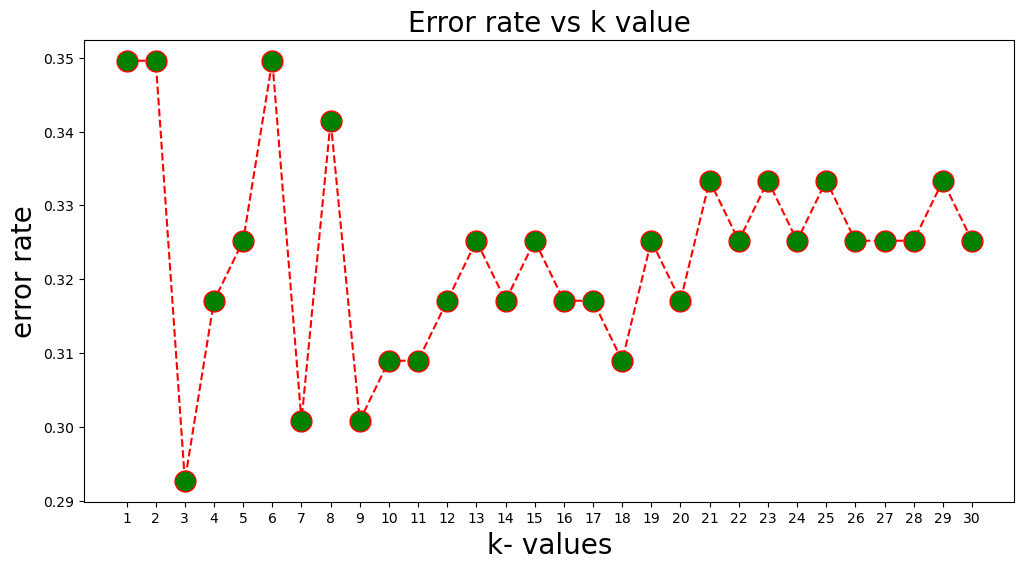

In [149]:
#plotting the error rate vs k graph
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
     linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

  ### We observe that error is minimum at k=10 and therefore use this value in training

In [150]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

### KNN Performance Metrics

0.6910569105691057 0.6842105263157895 0.975 0.8041237113402062


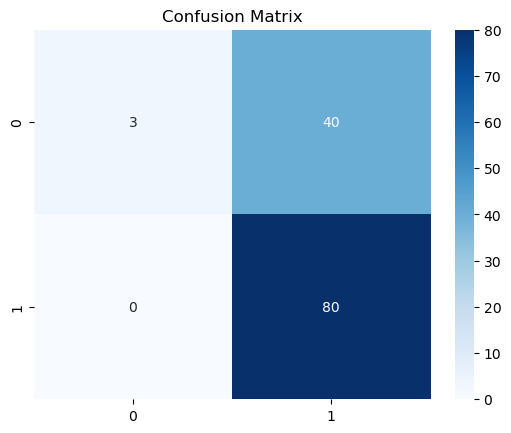

(3, 40, 0, 80)

In [151]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1_score = f1_score(y_test, y_pred_knn)
print(knn_accuracy, knn_precision, knn_recall, knn_f1_score)


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
tn,fp,fn,tp

## Decision Tree Model

In [152]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

### DT Performance Metrics

0.6991869918699187 0.7721518987341772 0.7625 0.7672955974842767


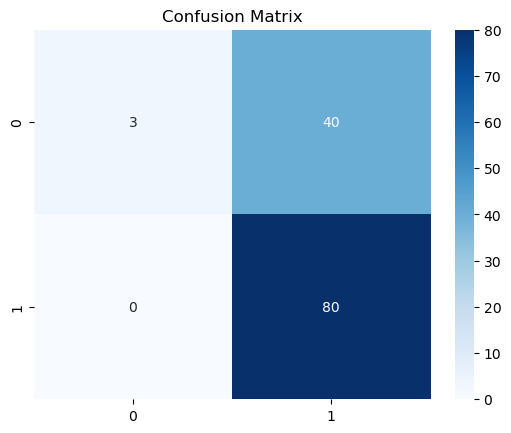

(3, 40, 0, 80)

In [153]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1_score = f1_score(y_test, y_pred_dt)
print(dt_accuracy, dt_precision, dt_recall, dt_f1_score)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
tn,fp,fn,tp

# Conclusion

Performance metrics are used to evaluate the performance of a machine learning model. These metrics provide a quantitative measure of how well the model is performing in terms of its ability to accurately predict the target variable.

1) Accuracy is one of the most commonly used performance metrics. It measures the percentage of correct predictions made by the model. High accuracy indicates that the model is making accurate predictions and is a good fit for the dataset.

2) Precision measures the percentage of correct positive predictions made by the model. It is important when the cost of a false positive is high. For example, in a medical diagnosis, the cost of a false positive could be high, as it may lead to unnecessary treatment. Therefore, high precision is desirable in such cases.

3) Recall measures the percentage of actual positive instances that were correctly identified by the model. It is important when the cost of a false negative is high. For example, in fraud detection, the cost of a false negative could be high, as it may result in the fraudulent activity going undetected. Therefore, high recall is desirable in such cases.

4) F1-score is a measure of the balance between precision and recall. It takes into account both metrics and provides a single measure of how well the model is performing. A high F1-score indicates that the model is making accurate predictions and is well balanced between precision and recall.

<br>

In summary, performance metrics are critical in evaluating the performance of a machine learning model. These metrics help us understand how well the model is performing and identify areas where it can be improved. By using appropriate performance metrics, we can build models that are better suited for the problem at hand.

## KNN vs DT Comparison

In [154]:
headers = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
table = [["KNN", knn_accuracy, knn_precision, knn_recall, knn_f1_score],
         ["Decision Tree", dt_accuracy, dt_precision, dt_recall, dt_f1_score]]

print(tabulate(table, headers, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model         │   Accuracy │   Precision │   Recall │   F1-Score │
╞═══════════════╪════════════╪═════════════╪══════════╪════════════╡
│ KNN           │   0.691057 │    0.684211 │   0.975  │   0.804124 │
├───────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree │   0.699187 │    0.772152 │   0.7625 │   0.767296 │
╘═══════════════╧════════════╧═════════════╧══════════╧════════════╛


Based on the above table, we can derive the following conclusions comparing the performance metrics of KNN and Decision Tree classifiers:

1) Accuracy: The Decision Tree classifier performs slightly better than the KNN classifier with an accuracy of 0.699187 compared to 0.691057 for KNN.

2) Precision: The Decision Tree classifier outperforms the KNN classifier with a precision of 0.772152 compared to 0.684211 for KNN.

3) Recall: KNN has a higher recall of 0.975 compared to 0.7625 for the Decision Tree classifier, indicating that KNN is better at identifying true positives.

4) F1-Score: KNN also has a slightly higher F1-Score of 0.804124 compared to 0.767296 for the Decision Tree classifier.






#### Overall, we can conclude that while KNN may have a higher recall and F1-Score, the Decision Tree classifier performs better in terms of accuracy and precision. Therefore, the choice between the two classifiers would depend on the specific requirements of the problem at hand.
